###### 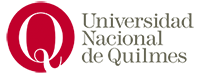

### Trabajo Final - Redes Neuronales Artificiales



<h1><center>Predicción de diagnóstico de Diabetes</center></h1>

  

<h4><center>Abigail Stricker, Andrea Aguilar</center></h4>
<h4><center>Profesor: Waldo Hasperué</center></h4>
<h4><center>Cohorte: Mayo 2022 - Maestría en Bioinformática y Biología de Sistemas</center></h4>

***
## Abstract
La diabetes es una de las enfermedades más comunes en el mundo, sin distinción geográfica o etnográfica. Existen diferentes tipos que conllevan diversas dificultades metabólicas. Se estima que 1 de cada 10 adultos en el mundo tiene algún tipo de diabetes[1]. En general, el diagnóstico ocurre luego de 10 años del inicio de la enfermedad[2]. En este trabajo se buscó generar un modelo de predicción de diabetes basado en datos del paciente sencillos de obtener, siendo la glucosa presente en sangre y el índice de masa de corporal los más importantes. 

***

## Introducción


***

## Metodología y Resultados

***

### Carga y exploración del dataset

Se utilizó un dataset generado a partir de los datos del Instituto Nacional de Diabetes, y Enfermedades Renales y Digestivas de Estados Unidos (NIDDK), compilada por Vincent G. Sigilito de la Universidad John Hopkins en 1990. Se tratan de muestras tomadas de la comunidad indígena Pima siendo todas los pacientes de sexo femenino y con al menos 21 años de edad [ref].  
Este dataset contiene 768 entradas con 8 clases numéricas y 1 clase binaria que determina si el diagnóstico es positivo (+1) o negativo (0). Estas clases son exámenes realizados en consultas médicas, la mayoría de ellas sencillas de realizar. En la tabla 1 se da un breve detalle de las clases. 

In [7]:
#librerias necesarias para comenzar a trabajar
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 

#carga y exploracion del dataset
data=pd.read_csv('C:\\Users\\amari\\Downloads\\RNA\\diabetes.csv')
print(data.shape)
print(data.dtypes)
data.head()



(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


|Característica | Descripción |
| :---: | :---:|
|         Cantidad de embarazos          |              Cantidad de embarazos que tuvo el paciente hasta el momento de los exámenes médicos (se tienen en cuenta sean que llegaron a término o no)                |
|            Glucosae               |              Concentración de glucosa en plasma (obtenida en la prueba de tolerancia a la glucosa, medida en mg/dL)             |
|          Presión sanguínea           |                Presión arterial diastólica (mm Hg)                |
|             SkinThickness              |                Grosor de pliegue cutáneo del triceps (mm). Presenta correlación la grasa corporal total                 |
|             Insulin            |                Insulina en suero obtenida en las mismas muestras en las que se midió la glucosa (mU/ml)                           |
|             IBM              |                      Indice de masa corporal (IMC, IBM por sus siglas en inglés), una medida de obesidad general                    |
|               Diabetes Pedigree Function            |      Es función que puntúa la probabilidad de diabetes en relación de los antecedentes familiares                                    |
|             Age              |                    Edad del paciente                      |
|             Outcome              |                    Clase binaria que indica el diagnóstico del paciente                      |
<center><i>Tabla 1. Lista de características disponibles de los pacientes.</i></center>

In [1]:
#Opcional: ver el dataset completo
#def print_full(x):
#    pd.set_option('display.max_rows', len(x))
#    print(x)
#    pd.reset_option('display.max_rows')

#print_full(data)

### Correlación de Variables


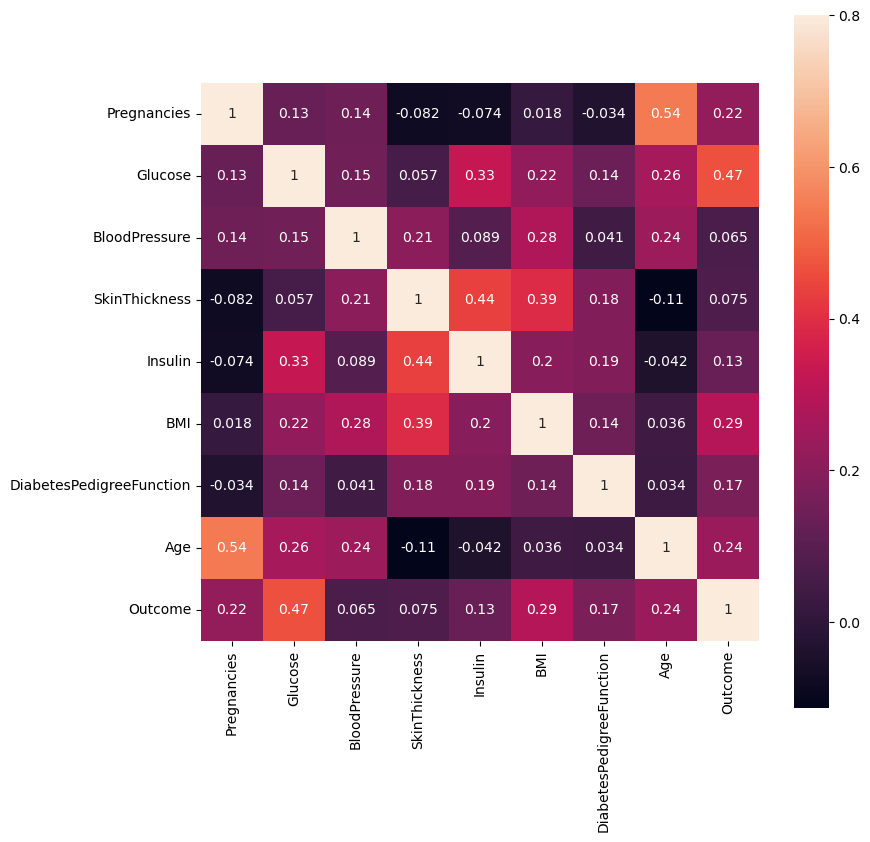

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlacion entre todas las variables 
corrmat = data.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

#### Comparación de edades de pacientes y glucosa en sangre con diagnóstico de diabetes


pacientes mayores a 45 años con diagnóstico positivo de diabetes: 
58


C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


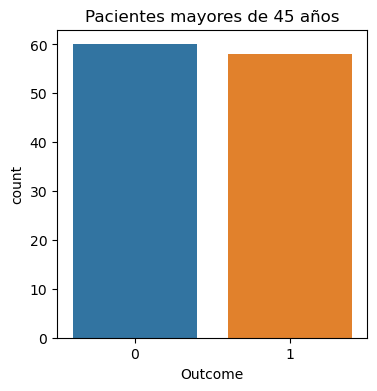

pacientes menores a 45 años con diagnóstico positivo de diabetes: 
197


C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


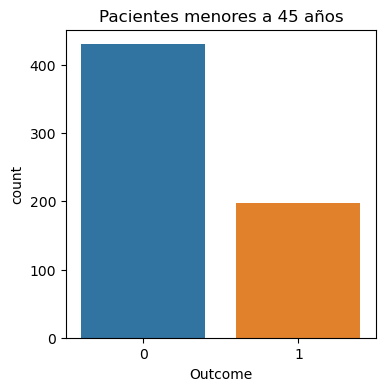

pacientes con glucosa en sangre inferior a 140 mg/dL con diagnóstico positivo de diabetes: 
133


C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


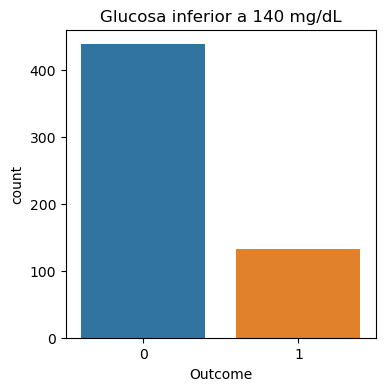

pacientes glucosa en sangre superior a 200 mg/dL con diagnóstico positivo de diabetes: 
0


pacientes glucosa en sangre inferior a 200 mg/dL y superior a 140 mg/dL con diagnóstico positivo de diabetes: 
206


C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


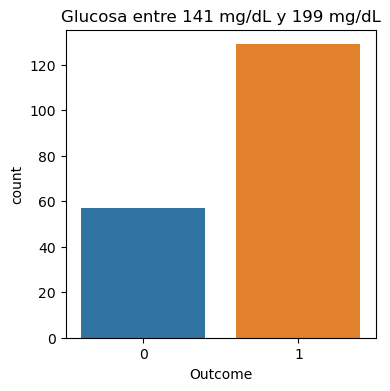

In [10]:
#exploracion de relacion entre edad, test de glucosa y presencia de diabetes
print("pacientes mayores a 45 años con diagnóstico positivo de diabetes: ")
print(len(data[(data['Age']>45) & (data['Outcome']==1)]))
adultos_mayora45 = data.loc[data["Age"] > 45]
adultos_mayora45.shape
y=adultos_mayora45['Outcome']
plt.figure(figsize=(4,4))
sns.countplot(y).set(title='Pacientes mayores de 45 años')
plt.show()

print("pacientes menores a 45 años con diagnóstico positivo de diabetes: ")
print(len(data[(data['Age']<44) & (data['Outcome']==1)]))
adultos_menora45 = data.loc[data["Age"] < 44]
adultos_menora45.shape
y=adultos_menora45['Outcome']
plt.figure(figsize=(4,4))
sns.countplot(y).set(title='Pacientes menores a 45 años')
plt.show()

print("pacientes con glucosa en sangre inferior a 140 mg/dL con diagnóstico positivo de diabetes: ")
print(len(data[(data['Glucose']<140) & (data['Outcome']==1)]))
glucosa_menor140 = data.loc[data["Glucose"] < 140]
glucosa_menor140.shape
y=glucosa_menor140['Outcome']
plt.figure(figsize=(4,4))
sns.countplot(y).set(title='Glucosa inferior a 140 mg/dL')
plt.show()

print("pacientes glucosa en sangre superior a 200 mg/dL con diagnóstico positivo de diabetes: ")
print(len(data[(data['Glucose']>200) & (data['Outcome']==1)]))
print("\n")

print("pacientes glucosa en sangre inferior a 200 mg/dL y superior a 140 mg/dL con diagnóstico positivo de diabetes: ")
print(len(data[(data['Glucose']>141) & data['Glucose']<199 & (data['Outcome']==1)]))
glucosa_prediabetes = data.loc[(data["Glucose"] >141) & (data['Glucose']<199)]
glucosa_prediabetes.shape
glucosa_prediabetes.head()
y=glucosa_prediabetes['Outcome']
plt.figure(figsize=(4,4))
sns.countplot(y).set(title='Glucosa entre 141 mg/dL y 199 mg/dL')
plt.show()

### Tratamiento del dataset


In [12]:
#Tratamiento de dataset. Reemplazo de valores NaN y escalado de variables
data.rename(columns={'Outcome': 'target'}, inplace=True) 
print(data.isnull().sum())
data.head()

standardScaler = StandardScaler()
columns_to_scale = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
data.shape
data = data[np.isfinite(data).all(1)]
data.shape
data.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
target                      0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


### Split del dataset en entrenamiento y testeo


C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


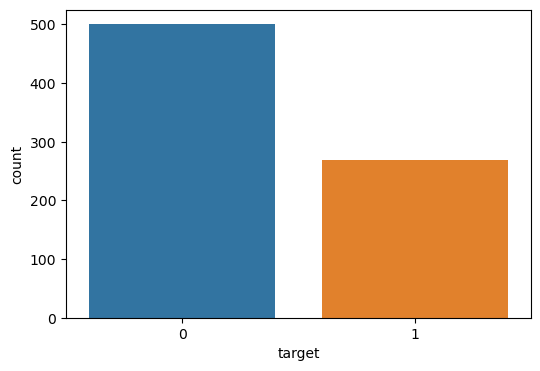

(537, 8)
(231, 8)


In [13]:
#Division de dataset en subsets de entrenamiento y testeo
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

#Ploteo del target (Diabetes)
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()
print(X_train.shape)
print(X_test.shape)



### Multilayer Perceptron (MLP)


In [14]:
#MULTILAYER PERCEPTRON (MLP)
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(30), alpha=0.001, max_iter=150)
model = MLP.fit(X_train, y_train)
MLP_predict = MLP.predict(X_test)
MLP_conf_matrix = confusion_matrix(y_test, MLP_predict)
MLP_acc_score = accuracy_score(y_test, MLP_predict)

#Imprimir la matriz de confusion y el score de exactitud("confussion matrix")
print(MLP_conf_matrix)
print("\n")
print(classification_report(y_test,MLP_predict))
print("Exactitud del clasificados MLP: {:.3f}".format(MLP_acc_score*100),'%\n')

[[140  17]
 [ 33  41]]


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.71      0.55      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.78       231

Exactitud del clasificados MLP: 78.355 %



C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


### Optimización de hiperparámetros de MLP


In [15]:
#Optimizacion de parametros de MLP
parameter_space = {
    'hidden_layer_sizes': [(30),],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


### MLP optimizado


In [16]:
#MULTILAYER PERCEPTRON (MLP) con valores optimizados
MLP_op = MLPClassifier(hidden_layer_sizes=(30), alpha=0.05, max_iter=150, activation='relu', learning_rate='constant',solver='adam')
model = MLP_op.fit(X_train, y_train)
MLP_op_predict = MLP_op.predict(X_test)
MLP_op_conf_matrix = confusion_matrix(y_test, MLP_op_predict)
MLP_op_acc_score = accuracy_score(y_test, MLP_op_predict)


#Imprimir la matriz de confusion y el score de exactitud("confussion matrix")
print(MLP_op_conf_matrix)
print("\n")
print(classification_report(y_test,MLP_op_predict))
print("Exactitud del clasificados MLP: {:.3f}".format(MLP_op_acc_score*100),'%\n')

[[137  20]
 [ 32  42]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.68      0.57      0.62        74

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.77      0.77      0.77       231

Exactitud del clasificados MLP: 77.489 %



C:\Users\amari\anaconda3\envs\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


### Curva ROC y valor de AUC

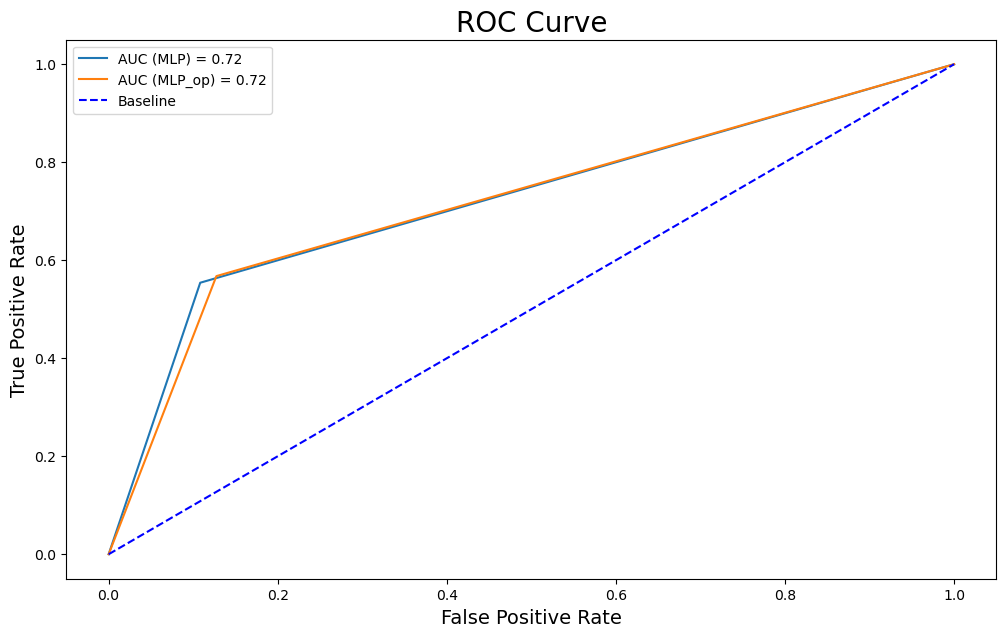

In [17]:
#Curva ROC
from sklearn.metrics import roc_auc_score, roc_curve
y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc_model = roc_auc_score(y_test_int, MLP_predict)
fpr_model, tpr_model, thresholds_model = roc_curve(y_test_int, MLP_predict)
auc_model_op = roc_auc_score(y_test_int, MLP_op_predict)
fpr_model_op, tpr_model_op, thresholds_model_op = roc_curve(y_test_int, MLP_op_predict)
plt.figure(figsize=(12, 7))
plt.plot(fpr_model, tpr_model, label=f'AUC (MLP) = {auc_model:.2f}')
plt.plot(fpr_model_op, tpr_model_op, label=f'AUC (MLP_op) = {auc_model:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

## Referencias
[1]International Diabetes Foundation “Global picture,” in IDF Atlas . 10th Edition, pp. 34–63. 

[2]Roche, M.M. and Wang, P.P. (2014). Factors associated with a diabetes diagnosis and late diabetes diagnosis for males and females. Journal of Clinical & Translational Endocrinology, 1(3), pp.77–84. doi:https://doi.org/10.1016/j.jcte.2014.07.002.

[3] www.cdc.gov. (2020). Información sobre la diabetes | Información Básica | Diabetes | CDC. [online] Available at: https://www.cdc.gov/diabetes/spanish/basics/diabetes.html.

[4]who.int/es. (2022). Diabetes - Nota descriptiva. [online] Disponible: https://www.who.int/es/news-room/fact-sheets/detail/diabetes#:~:text=M%C3%A1s%20de%20un%2095%25%20de,peso%20y%20a%20la%20inactividad%20f%C3%ADsica. [Accessed 2 Feb. 2022].

[5]Javier, F. and Fernando Escobar Jiménez (2009). La diabetes mellitus en la práctica clínica. Madrid, España: Médica Panamericana.

[6]National Institute of Diabetes and Digestive and Kidney Diseases. (n.d.). ¿Qué es la Diabetes? - Diabetes tipo 1. [online] Available at: https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/informacion-general/que-es/diabetes-tipo-1 [Accessed 8 Feb. 2022].

[7]WebMD. (n.d.). Type 2 Diabetes Screening. [online] Available at: https://www.webmd.com/diabetes/type-2-diabetes-screening#:~:text=According%20to%20the%20American%20Diabetes,earlier%20age%20and%20more%20frequently [Accessed 9 Feb. 2022].

[8]Narayan, K.M.V., Chan, J. and Mohan, V. (2010). Early Identification of Type 2 Diabetes: Policy should be aligned with health systems strengthening. Diabetes Care, 34(1), pp.244–246. doi:https://doi.org/10.2337/dc10-1952.

[9]Herman, W.H. et al. (2015) “Early detection and treatment of type 2 diabetes reduce cardiovascular morbidity and mortality: A simulation of the results of the Anglo-danish-dutch study of intensive treatment in people with screen-detected diabetes in primary care (addition-Europe),” Diabetes Care, 38(8), pp. 1449–1455. Available at: https://doi.org/10.2337/dc14-2459. 

[10]Khan, M.A. et al. (2019) “Epidemiology of type 2 diabetes – global burden of disease and forecasted trends,” Journal of Epidemiology and Global Health, 10(1), p. 107. Available at: https://doi.org/10.2991/jegh.k.191028.001. 

[11]Wikipedia Contributors (2019). Epidemiology of diabetes. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Epidemiology_of_diabetes.

[12]Booth, C. et al. (2017) “Policy and Social Factors Influencing Diabetes among Pima Indians in Arizona, USA ,” Public Policy and Administration Research , 7(3). 

